In [1]:
import sklearn

sklearn.__version__


'0.23.2'

## Optimal Least Square Regression

[[6], [8], [10], [14], [18]]
[[7], [9], [13], [17.5], [18]]


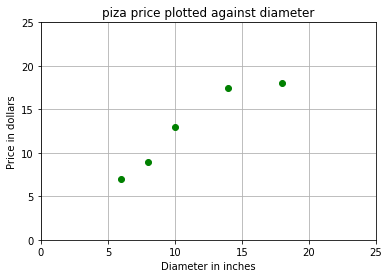

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
psize = [[6],[8],[10],[14],[18]]
pprice = [[7],[9],[13],[17.5],[18]]
print(psize)
print(pprice)
plt.figure()
plt.title('piza price plotted against diameter')
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.plot(psize,pprice,'go') #fmt
plt.axis([0,25,0,25])  #x1,x2,y1,y2
plt.grid()
plt.show()

[[10], [8], [6], [14]]
[[18]]
[[13], [9], [7], [17.5]]
[[18]]


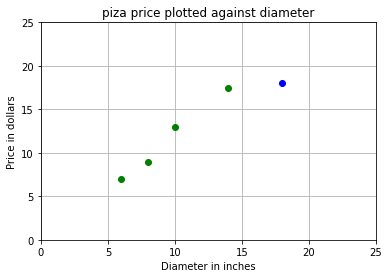

In [3]:
from sklearn.model_selection import train_test_split

psize_train,psize_test,pprice_train,pprice_test = train_test_split(psize,pprice,test_size=0.2)

#other arguments => random_state = None , shuffle = True

print(psize_train)
print(psize_test)
print(pprice_train)
print(pprice_test)

plt.figure()
plt.title('piza price plotted against diameter')
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.plot(psize_train,pprice_train,'go') #fmt
plt.plot(psize_test,pprice_test,'bo') #fmt
plt.axis([0,25,0,25])  #x1,x2,y1,y2
plt.grid()
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression ## OLS


#create and fit the model
model = LinearRegression() #y=mx+c

model.fit(psize_train,pprice_train)  # (2dimen,2dimen)  #ex = y= 2x+3

print(pprice_test)   #actual output - Expected output
print(model.predict(psize_test))  #predicted

[[18]]
[[23.1]]


In [5]:
print(model.predict([[0]]))   # X is 2D input.... so 0 must be retun i 2D format
print(model.predict([[25]]))
print(model.predict([[0],
                    [10],
                    [20]]))

#print(model.predict([[0,10]]))

[[-1.2]]
[[32.55]]
[[-1.2]
 [12.3]
 [25.8]]


In [6]:
print(model.predict([[25]])[0][0])
print(model.predict([[0],[10],[20]])[2])

32.55
[25.8]


In [7]:
print("slope(m):%.5f ,intercept(c): %.5f"%(model.coef_,model.intercept_))

slope(m):1.35000 ,intercept(c): -1.20000


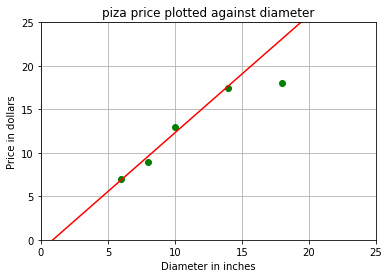

In [8]:
# plot initial Data

plt.figure()
plt.title('piza price plotted against diameter')
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.plot(psize,pprice,'go') #fmt
plt.axis([0,25,0,25])  #x1,x2,y1,y2
plt.grid()
#plot regression solution line
plt.plot([0,25],[model.predict([[0]])[0][0],
                model.predict([[25]])[0][0]],color='r')
plt.show()

In [9]:
print(model.score(psize,pprice))  #returns the coefficient of correlation R2 of the prediction

0.7231481481481479


In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(pprice,model.predict(psize), multioutput = 'uniform_average')
#multioutput defines weighs used to average errors
print("MSE is : ",mse)

MSE is :  5.382000000000003


In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(pprice,model.predict(psize))
print("R2 is" , r2)

R2 is 0.7231481481481479
